In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
import random
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

### Import Dataset Plat

In [16]:
path = '/content/drive/MyDrive/dummy'
images = []
for filename in os.listdir(path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(path, filename))
        if img is not None:
            images.append(img)

### Function Pixel Plot

In [21]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

### Proses Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

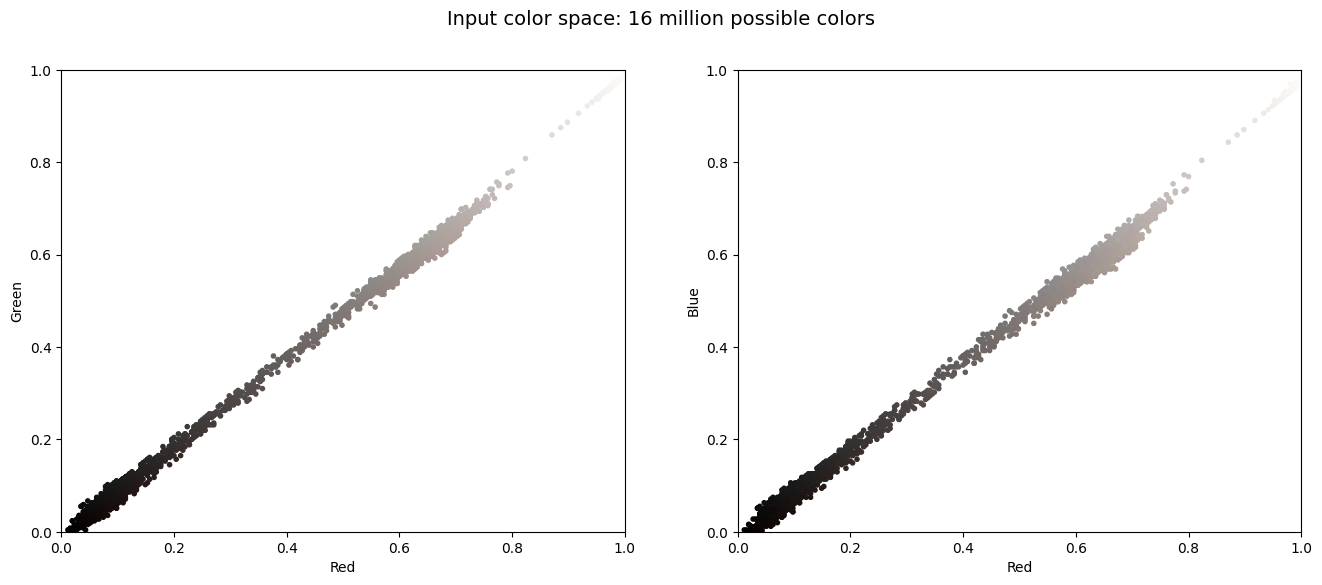

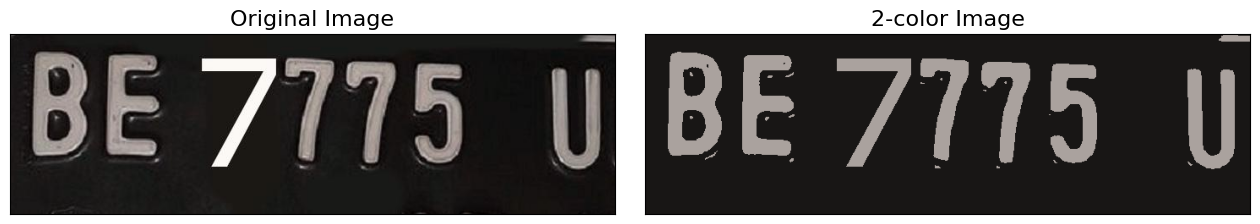

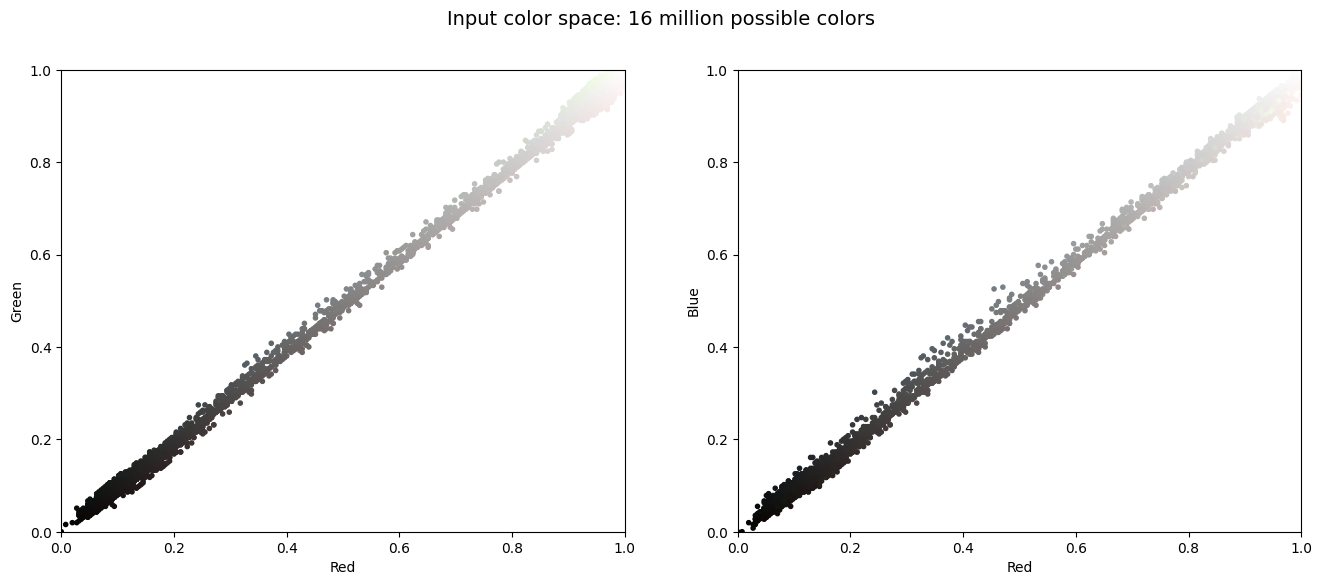

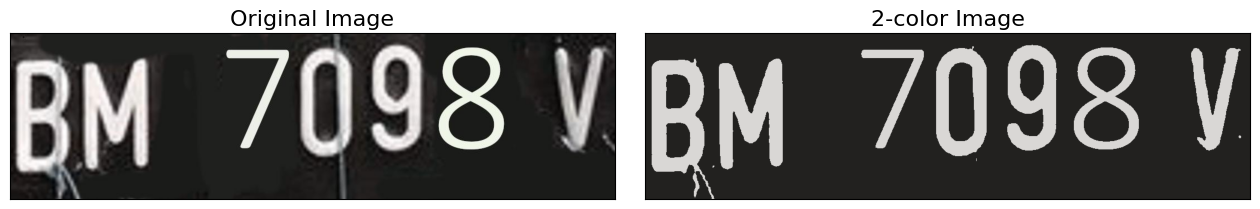

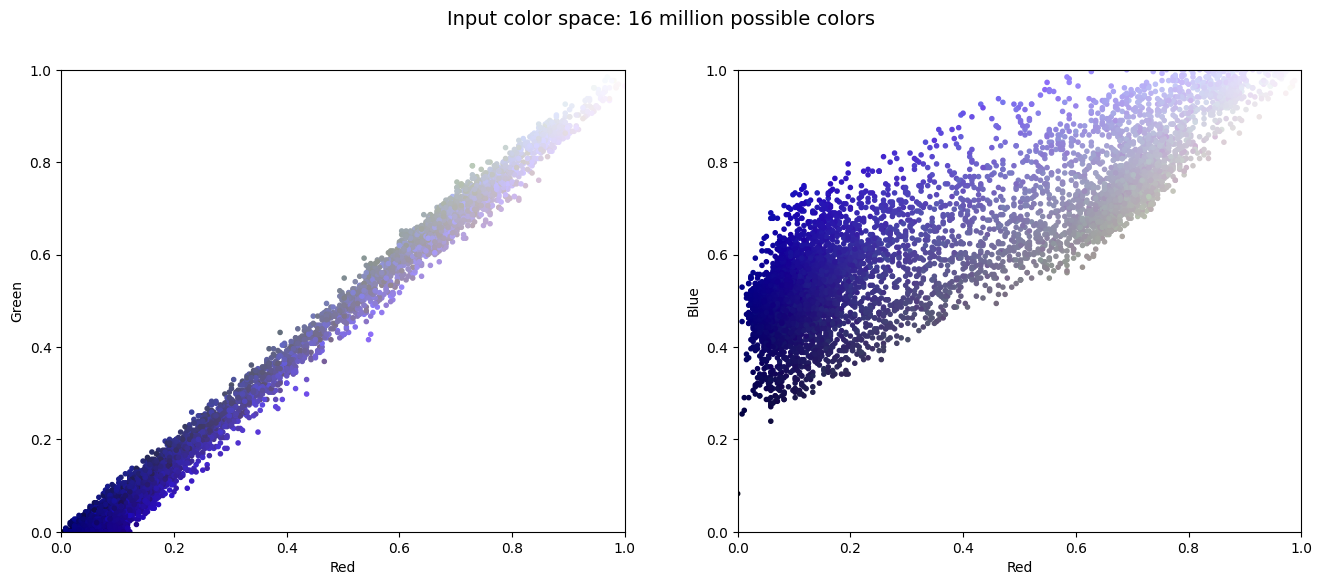

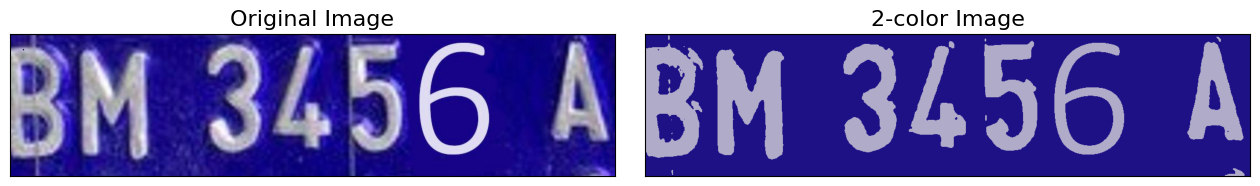

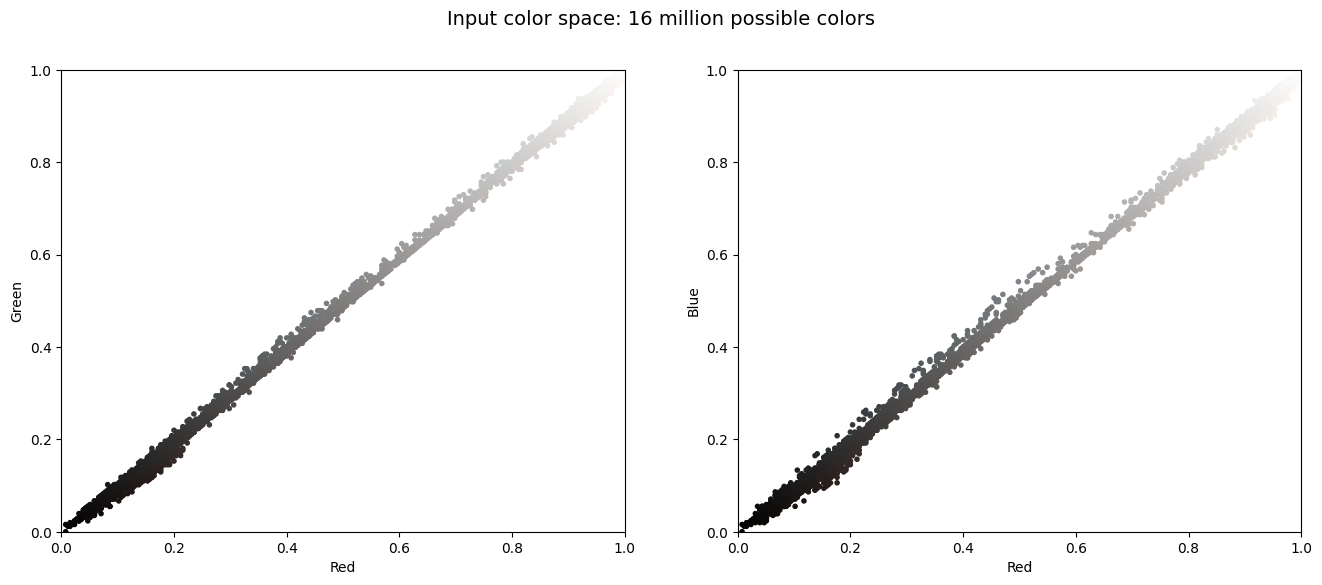

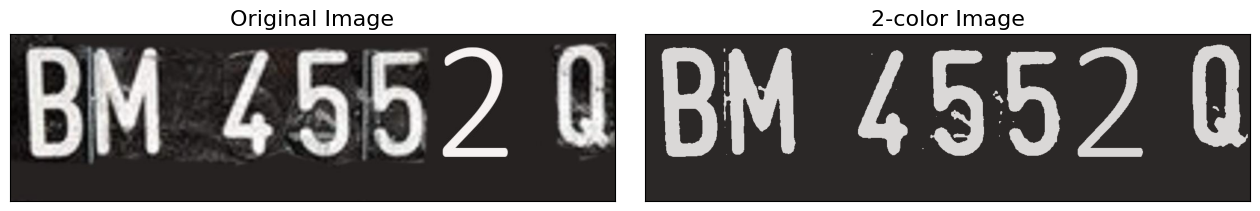

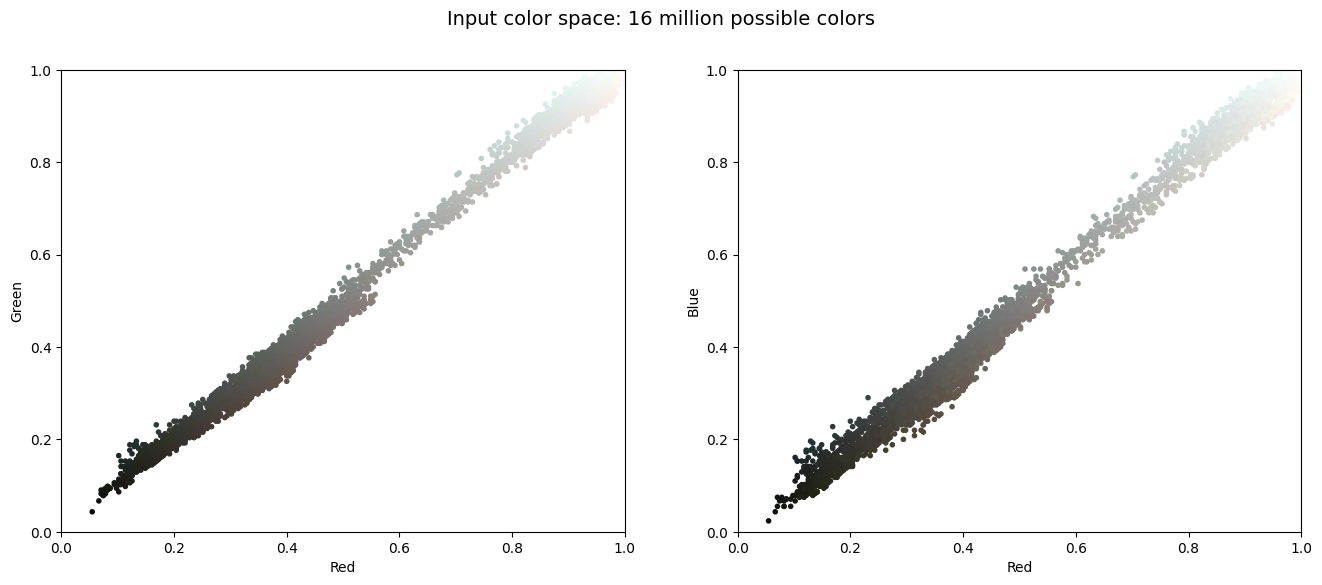

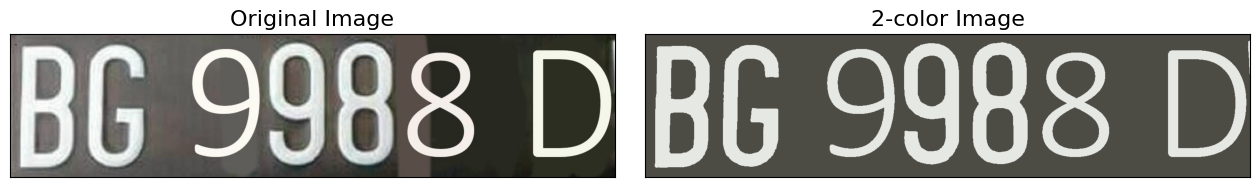

In [22]:
for i in images:
  h, w, ch= i.shape
  plat = i / 255.0
  plat = plat.reshape(h * w, ch)
  plat.shape
  plot_pixels(plat, title='Input color space: 16 million possible colors')

  kmeans = MiniBatchKMeans(2)
  kmeans.fit(plat)
  new_colors = kmeans.cluster_centers_[kmeans.predict(plat)]

  img_recolored = new_colors.reshape(i.shape)

  fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                        subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(wspace=0.05)
  ax[0].imshow(i)
  ax[0].set_title('Original Image', size=16)
  ax[1].imshow(img_recolored)
  ax[1].set_title('2-color Image', size=16)

